## U Food Marketing Analysis

## UFood is the lead food delivery app in Brazil, present in over a thousand cities.
### The Company Overview
Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and
regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and company’s website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
food = pd.read_csv('/Users/thuongnguyen/Documents/Project/Pandas analyst buider /Food Marketing Data Analysis/ufoodmarketing.csv')
pd.set_option('display.max.rows',2300)
pd.set_option('display.max.columns',50)
food.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [74]:
food[food.duplicated()].count()

Income                  184
Kidhome                 184
Teenhome                184
Recency                 184
MntWines                184
MntFruits               184
MntMeatProducts         184
MntFishProducts         184
MntSweetProducts        184
MntGoldProds            184
NumDealsPurchases       184
NumWebPurchases         184
NumCatalogPurchases     184
NumStorePurchases       184
NumWebVisitsMonth       184
AcceptedCmp3            184
AcceptedCmp4            184
AcceptedCmp5            184
AcceptedCmp1            184
AcceptedCmp2            184
Complain                184
Z_CostContact           184
Z_Revenue               184
Response                184
Age                     184
Customer_Days           184
marital_Divorced        184
marital_Married         184
marital_Single          184
marital_Together        184
marital_Widow           184
education_2n Cycle      184
education_Basic         184
education_Graduation    184
education_Master        184
education_PhD       

In [75]:
food.drop_duplicates(keep = False, inplace = True)

In [76]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [77]:
food['total_children'] = food[['Kidhome','Teenhome']].sum(axis = 1)

In [78]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})



In [79]:
food['marital_status'] = food[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].sum(axis = 1)

In [80]:
food['marital_status.str'] = food['marital_status'].map({5:'Divorced', 4: 'Married', 3:'Single',2:'Together', 1:'Widow'})

In [81]:
food[food['marital_status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status.str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


In [82]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})



In [83]:
food['education_status'] = food[['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].sum(axis = 1)

In [84]:
food['education_status.str'] = food['education_status'].map({5:'education_PhD', 4: 'education_Master', 3:'education_Graduation',2:'education_Basic', 1:'education_2n Cycle'})

In [85]:
food['Accepted_campaign'] = (food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum(axis=1) != 0).astype(int)

In [86]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status.str,education_status,education_status.str,Accepted_campaign
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,education_Graduation,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,education_Graduation,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,education_Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,education_Graduation,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,education_PhD,0


In [87]:
numeric_food = food.select_dtypes(include=[np.number])
numeric_food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,education_status,Accepted_campaign
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,3,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,3,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,5,0


In [88]:
food_correlation = numeric_food.corr(method='pearson')['Accepted_campaign'].sort_values(ascending=False)
print(food_correlation)


Accepted_campaign       1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
education_status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
marital_status         -0.021551
marital_To

<Axes: >

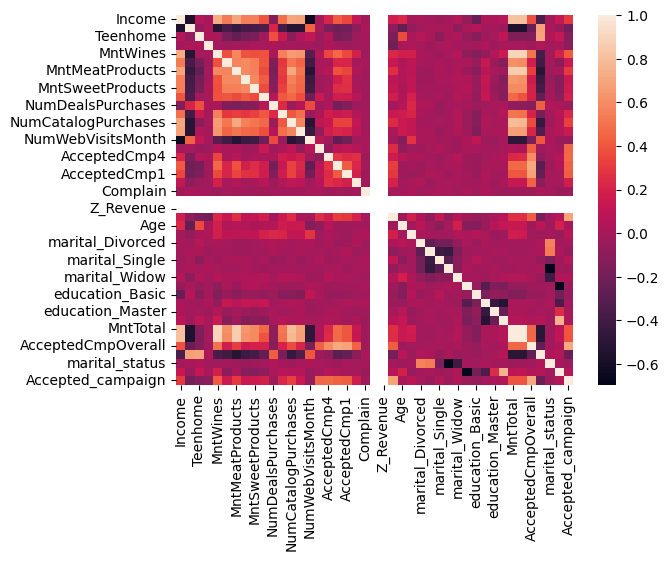

In [89]:
sns.heatmap(numeric_food.corr(method='pearson'))

<Axes: >

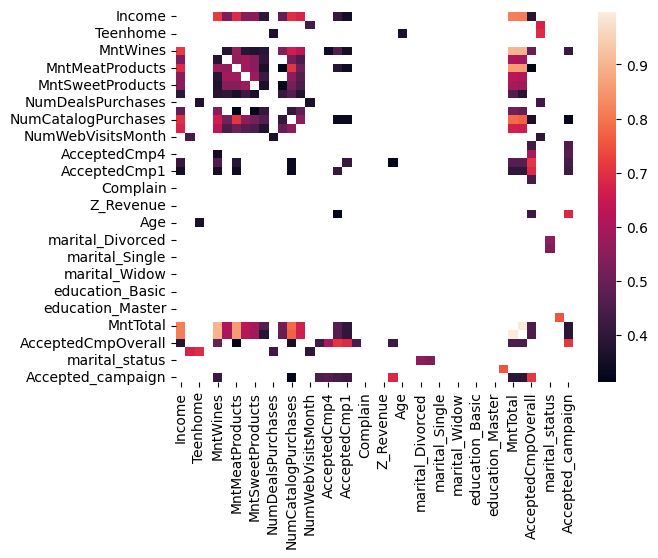

In [90]:
all_correlations = numeric_food.corr(method='pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations <1)]
all_correlations
sns.heatmap(all_correlations)

In [91]:
age_group_default = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_group_default:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

food['Age_groups'] = food['Age'].apply(assign_age_group) 

<Axes: xlabel='Age_groups', ylabel='Accepted_campaign'>

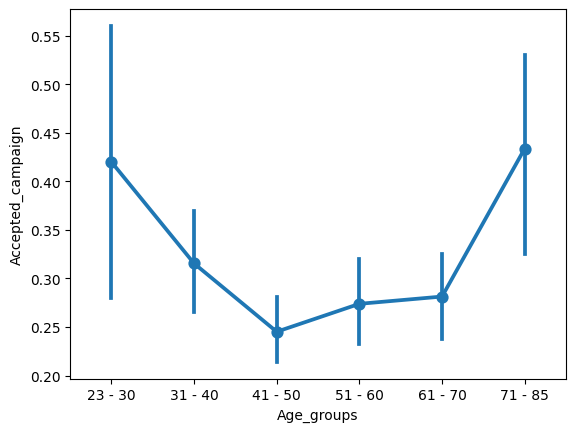

In [93]:
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']
sns.pointplot(data = food, x = 'Age_groups', y = 'Accepted_campaign',order = age_order)

In [94]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status.str,education_status,education_status.str,Accepted_campaign,Age_groups
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,education_Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,education_Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,education_Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,education_Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,education_PhD,0,31 - 40


In [95]:
counts = food['Age_groups'].value_counts()

In [96]:
age_percent = counts / food.shape[0]

In [97]:
age_percent = age_percent.reset_index().sort_values('Age_groups')

In [98]:
age_percent.columns = ['Age_groups', 'percentage']
age_percent

,Age_groups,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


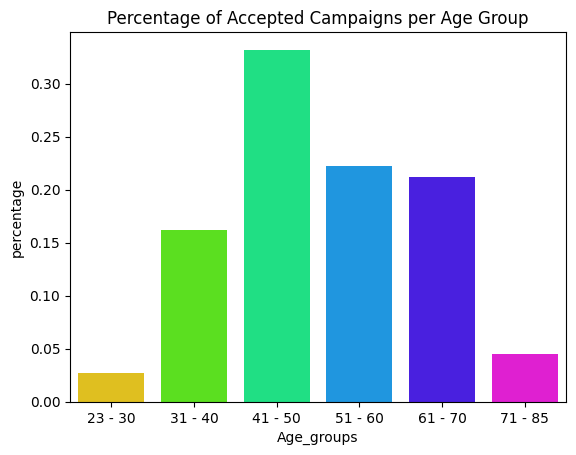

In [99]:
custom_palette = sns.color_palette("hsv", len(age_percent))
sns.barplot(x = 'Age_groups', y = 'percentage' , hue='Age_groups', data = age_percent, palette= custom_palette)
plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()

In [100]:
# Age Segmetation - core audience for accepting campaign right now is 31-70. But we still need more information on
# how much those groups actually spend with those % values of accepting campaigns, then we can suggest more 
# valuable recommendations for the company. 

In [101]:
grouped_food = food.groupby('Age_groups')['MntTotal'].sum().reset_index()
grouped_food 

,Age_groups,MntTotal
0,23 - 30,40166
1,31 - 40,135044
2,41 - 50,297347
3,51 - 60,242313
4,61 - 70,249793
5,71 - 85,76828


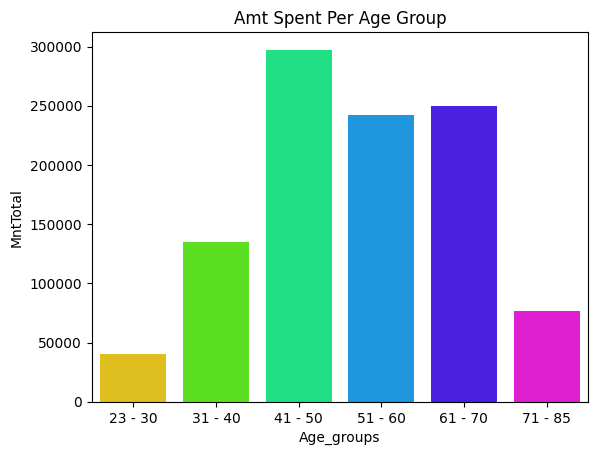

In [102]:
custom_palette = sns.color_palette("hsv", len(grouped_food))
sns.barplot(x = 'Age_groups', y = 'MntTotal' , hue='Age_groups', data = grouped_food, palette= custom_palette)
plt.title('Amt Spent Per Age Group')
plt.show()

In [103]:
# age group 23-30,31-40 and over 70 spend less than other age groups 

In [104]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status.str,education_status,education_status.str,Accepted_campaign,Age_groups
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,education_Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,education_Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,education_Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,education_Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,education_PhD,0,31 - 40


In [105]:
accepted = food[food['Accepted_campaign'] != 0]
aptgrouped_food = accepted.groupby('Age_groups')['MntTotal'].sum().reset_index()
aptgrouped_food 

,Age_groups,MntTotal
0,23 - 30,25917
1,31 - 40,83939
2,41 - 50,119793
3,51 - 60,102519
4,61 - 70,106094
5,71 - 85,46307


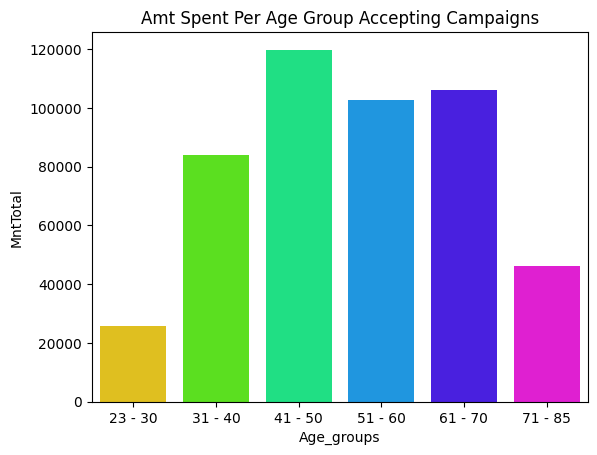

In [106]:

custom_palette = sns.color_palette("hsv", len(grouped_food))
sns.barplot(x = 'Age_groups', y = 'MntTotal' , hue='Age_groups', data = aptgrouped_food, palette= custom_palette)
plt.title('Amt Spent Per Age Group Accepting Campaigns')
plt.show()

In [107]:
# age group 23-30, 31-40 and over 70 with accepting campaigns tend to spend more than other age groups 
# Age Segmetation - core audience for accepting campaign right now is age group 23-30, 31-40 and over 70 who 
# accept at higher rates. 

In [108]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status.str,education_status,education_status.str,Accepted_campaign,Age_groups
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,education_Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,education_Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,education_Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,education_Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,education_PhD,0,31 - 40


In [109]:
type_of_purchase = food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().reset_index()
type_of_purchase.columns = ['Type_of_purchase','TotalNoSales']
type_of_purchase

,Type_of_purchase,TotalNoSales
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


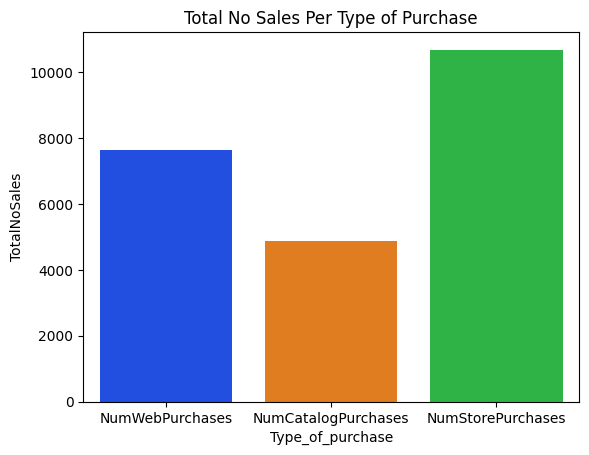

In [110]:
sns.barplot(data = type_of_purchase, x= 'Type_of_purchase', hue = 'Type_of_purchase',y = 'TotalNoSales',palette= 'bright')
plt.title('Total No Sales Per Type of Purchase')
plt.show()

In [111]:
apttype_of_purchase = accepted[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().reset_index()
apttype_of_purchase.columns = ['Type_of_purchase','TotalNoSales']
apttype_of_purchase

,Type_of_purchase,TotalNoSales
0,NumWebPurchases,2672
1,NumCatalogPurchases,2131
2,NumStorePurchases,3417


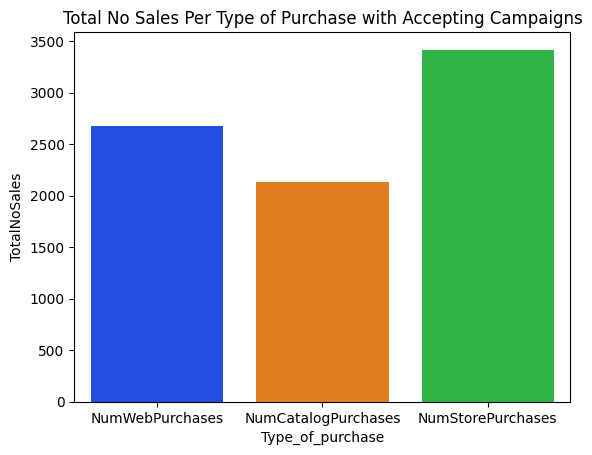

In [112]:
sns.barplot(data = apttype_of_purchase, x= 'Type_of_purchase', hue = 'Type_of_purchase',y = 'TotalNoSales',palette= 'bright')
plt.title('Total No Sales Per Type of Purchase with Accepting Campaigns')
plt.show()

In [113]:
# people who accept the campaigns tend to purchase more at catalog 

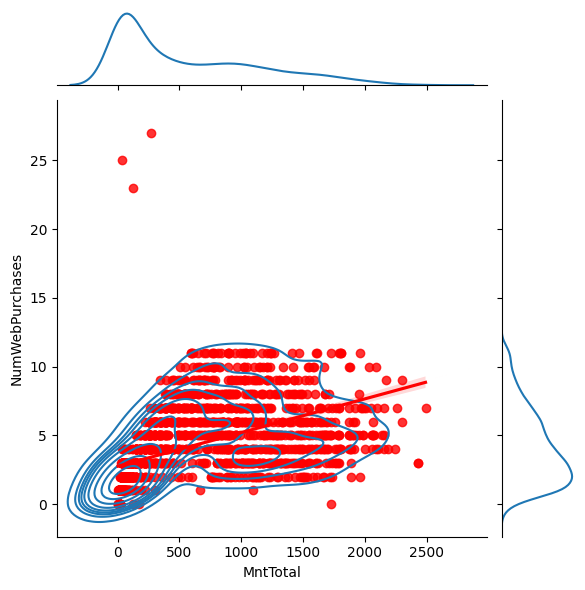

In [114]:
Web = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind="kde")
Web.plot_joint(sns.regplot, color = 'red')

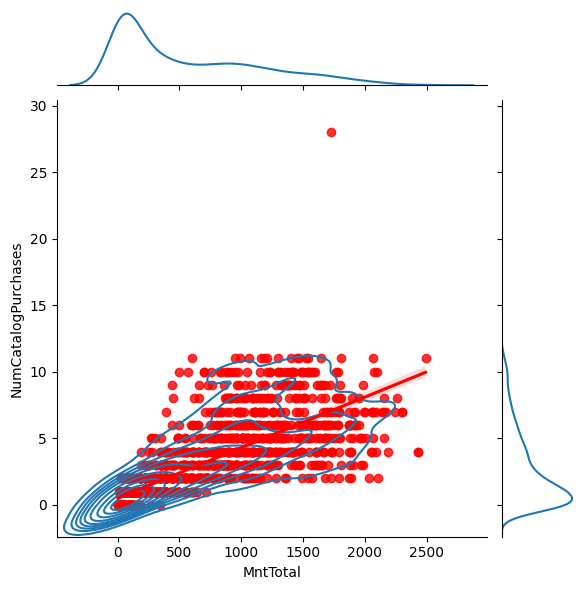

In [115]:
Catalog = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind="kde")
Catalog.plot_joint(sns.regplot, color = 'red')

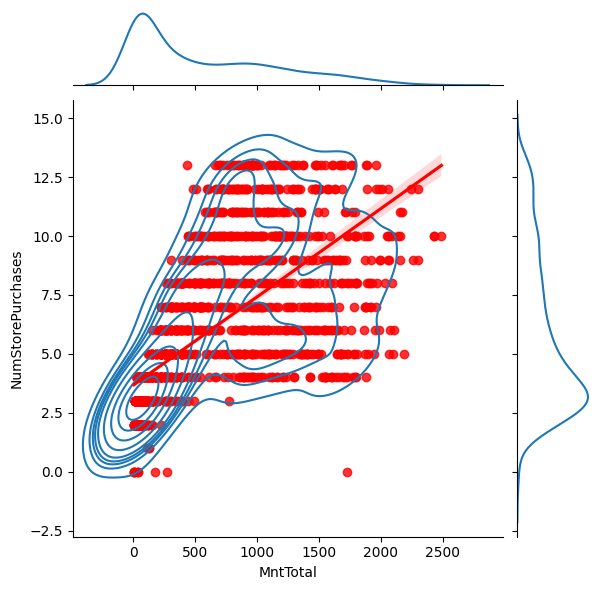

In [116]:
Store = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind="kde")
Store.plot_joint(sns.regplot, color = 'red')

In [117]:
# 2 directions: boost up the higher percentage catalog customers. or focus on in sotre/web becasue they have more traffics

<Axes: xlabel='total_children', ylabel='MntTotal'>

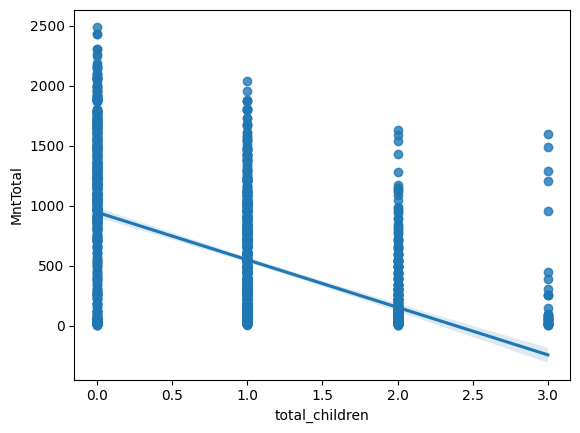

In [118]:
sns.regplot(x='total_children',y = 'MntTotal', data = food)

In [119]:
# people who have less children tend to spend more money 

<Axes: xlabel='total_children', ylabel='Accepted_campaign'>

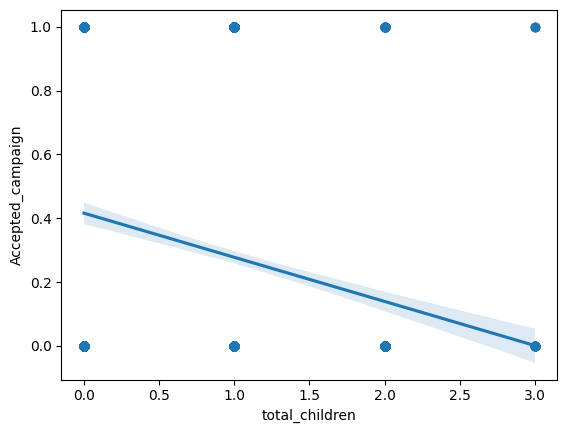

In [120]:
sns.regplot(x='total_children',y = 'Accepted_campaign', data = food)

In [121]:
# people with less kid are more likely to accept the campaigns and spend more money 

In [122]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,total_children,marital_status,marital_status.str,education_status,education_status.str,Accepted_campaign,Age_groups
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,education_Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,education_Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,education_Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,education_Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,education_PhD,0,31 - 40


<Axes: xlabel='education_status', ylabel='Accepted_campaign'>

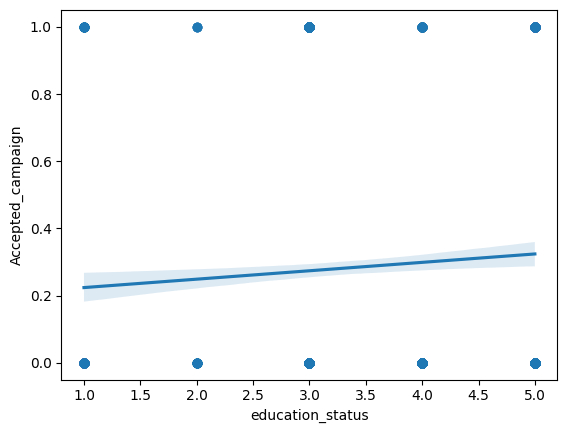

In [123]:
sns.regplot(x='education_status',y = 'Accepted_campaign', data = food)

In [124]:
# people with higher education level tend to accept more campaigns 

<Axes: xlabel='education_status', ylabel='MntTotal'>

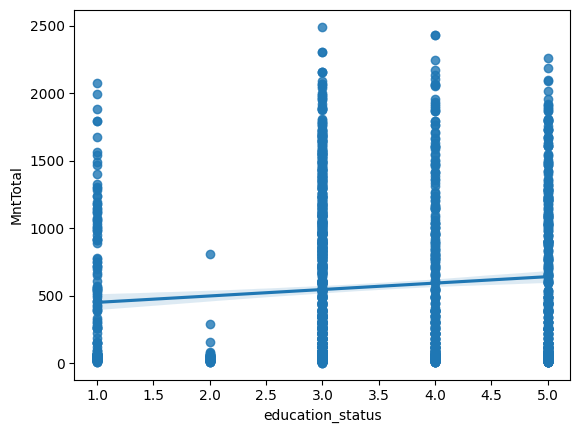

In [125]:
sns.regplot(x='education_status',y = 'MntTotal', data = food)

In [126]:
# Education is not really significant in our segmentation. 

<Axes: xlabel='marital_status.str', ylabel='count'>

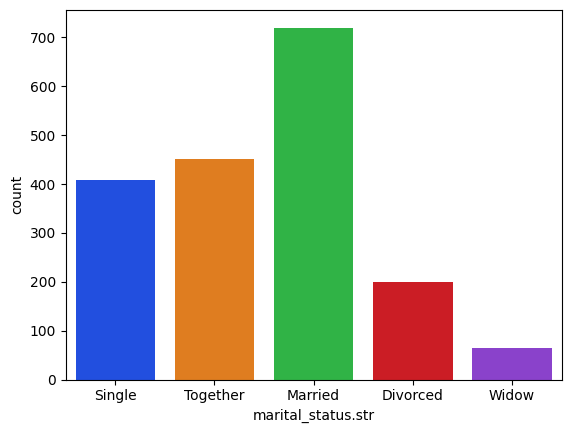

In [127]:
sns.countplot( data = food , x = 'marital_status.str',hue = 'marital_status.str',palette= 'bright')

<Axes: xlabel='marital_status', ylabel='MntTotal'>

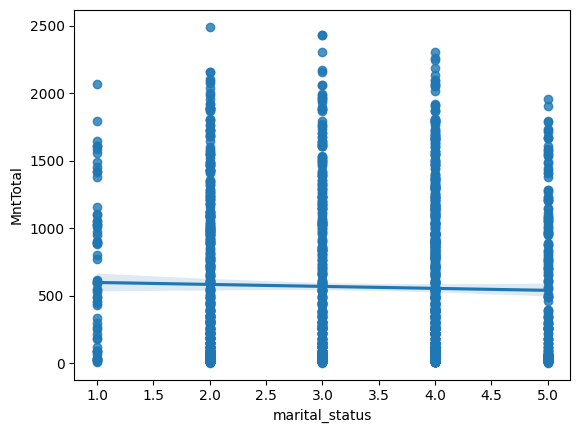

In [128]:
sns.regplot(x='marital_status',y = 'MntTotal', data = food)

In [129]:
marital = food.groupby('marital_status.str')['MntTotal'].sum().reset_index()
marital

,marital_status.str,MntTotal
0,Divorced,111813
1,Married,397442
2,Single,231616
3,Together,254606
4,Widow,46014


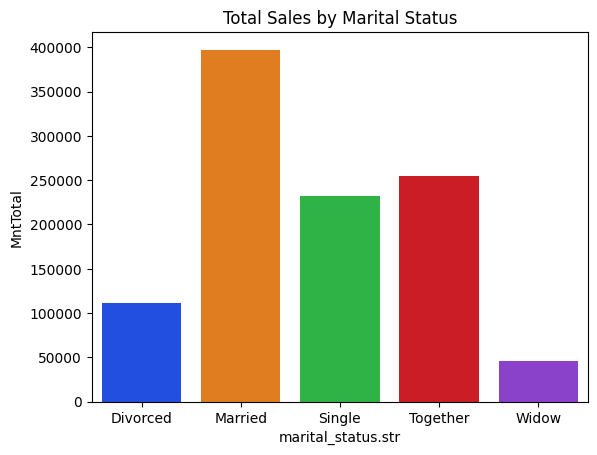

In [130]:
sns.barplot(data=marital, x='marital_status.str', y='MntTotal',hue = 'marital_status.str',palette= 'bright')
plt.title('Total Sales by Marital Status')
plt.show()

In [131]:
aptmarital = accepted.groupby('marital_status.str')['MntTotal'].sum().reset_index()
aptmarital

,marital_status.str,MntTotal
0,Divorced,51731
1,Married,174300
2,Single,121036
3,Together,113856
4,Widow,23646


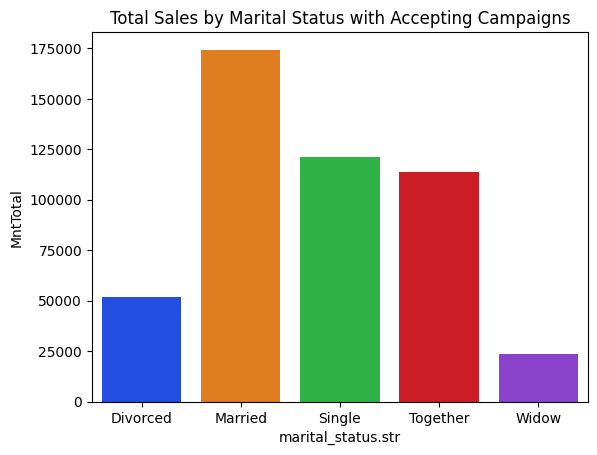

In [132]:
sns.barplot(data=aptmarital, x='marital_status.str', y='MntTotal',hue = 'marital_status.str',palette= 'bright')
plt.title('Total Sales by Marital Status with Accepting Campaigns')
plt.show()

In [133]:
total = food['marital_status.str'].value_counts()
counted_accepted = food[food['Accepted_campaign'] != 0]['marital_status.str'].value_counts()

In [134]:
percent_accepted = counted_accepted / total * 100

In [135]:
percentmarital_accepted = percent_accepted.reset_index()


In [136]:
percentmarital_accepted.columns = ['Marital_status','Percentage']

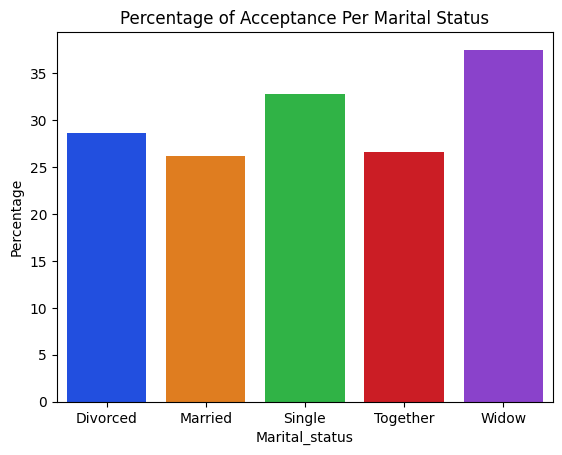

In [137]:
sns.barplot(data=percentmarital_accepted, x='Marital_status', y='Percentage',hue = 'Marital_status',palette= 'bright')
plt.title('Percentage of Acceptance Per Marital Status')
plt.show()

In [138]:
# Married, Single, Together marital status are spending a lot of mone than widow and divorced

## Overall Findings
     1. Age and Spending Patterns: Individuals aged 30-70 spend more money overall but are less likely to accept marketing campaigns. However, this age group represents a high volume of the customer base.
     2. Campaign Acceptance by Channel: Customers reached through catalogs are more likely to accept campaigns, while those who shop in person tend to spend more. A recommended split for targeting across different channels is 40% catalog, 30% store, and 30% web.
     3. Family Status: Focus marketing efforts on individuals with fewer or no children, as they show higher spending patterns.
     4. Education Level: Higher education levels do not significantly impact the acceptance rate of campaigns, so this demographic factor does not need special focus.
     5. Marital Status: Marital status does not significantly influence spending behavior. However, married, single, and partnered individuals tend to spend more money.
## Recommendations for Increasing Sales
     Target Demographic: Focus on middle-aged individuals (30-70), particularly high earners with no children. Utilize a diversified approach across the suggested platforms with a 40% catalog,30% store,and 30% web split.
## Recommendations for Engaging New Users
     Target Younger and Older Age Groups: Concentrate efforts on the 23-30 and over 70 age groups, as they statistically have higher campaign acceptance rates.